<a href="https://colab.research.google.com/github/VaishnaviRahatwad/Vaishnavi-Rahatwad-/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve

In [2]:

# Step 2: Create a sample dataset
data = {'Age': [22, 25, 47, 52, 46, 56, 48, 55, 60, 62],
        'EstimatedSalary': [15000, 29000, 52000, 72000, 70000, 81000, 61000, 95000, 79000, 67000],
        'Purchased': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]}

df = pd.DataFrame(data)


In [3]:
# Step 3: Split data into features (X) and target (y)
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [4]:
# Step 4: Split dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Step 5: Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Step 6: Train logistic regression model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [7]:
# Step 7: Make predictions
y_pred = model.predict(X_test)


In [8]:
# Step 8: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[2]]
Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<ipython-input-10-c06a12541c1e>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


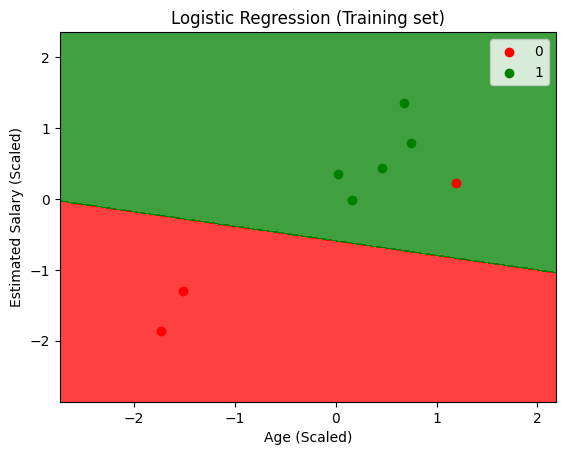

In [10]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, and model are already defined
X_set, y_set = X_train, y_train

# Create a grid of points covering the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict the decision boundary for the grid points
predictions = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the decision boundary using contourf
plt.contourf(
    X1, X2, predictions,
    alpha=0.75, cmap=ListedColormap(['red', 'green'])  # Ensure square brackets
)

# Set axis limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(['red', 'green'])(i), label=j
    )

# Add titles and labels
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.legend()
plt.show()
